In [ ]:
# Run once at the start of the notebook
!apt-get -y update && apt-get -y install fonts-dejavu-core

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,607 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,863 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/main amd64 Packages [47.4 kB]
Get:13 http

In [ ]:
ls

config.yaml      predict.py            report_outputs/    train.py
GroundTruth.csv  pre_processing_data/  requirements.txt   UNet.ipynb
input/           __pycache__/          resnet50_model.h5
models/          README.md             source/


In [ ]:
import kagglehub
yaseenah_sdp_model_2_pytorch_default_1_path = kagglehub.model_download('sailakshman11/sdp_model_2/PyTorch/default/1')

print('Data source import complete.')


  0%|          | 0.00/89.2M [00:00<?, ?B/s]
  1%|          | 1.00M/89.2M [00:00<00:52, 1.75MB/s]
  2%|▏         | 2.00M/89.2M [00:00<00:26, 3.39MB/s]
  4%|▍         | 4.00M/89.2M [00:00<00:12, 7.15MB/s]
  9%|▉         | 8.00M/89.2M [00:00<00:05, 15.0MB/s]
 13%|█▎        | 12.0M/89.2M [00:01<00:04, 17.8MB/s]
 17%|█▋        | 15.0M/89.2M [00:01<00:04, 17.4MB/s]
 20%|██        | 18.0M/89.2M [00:01<00:03, 19.5MB/s]
 24%|██▎       | 21.0M/89.2M [00:01<00:03, 18.4MB/s]
 28%|██▊       | 25.0M/89.2M [00:01<00:02, 23.3MB/s]
 33%|███▎      | 29.0M/89.2M [00:01<00:02, 27.5MB/s]
 37%|███▋      | 33.0M/89.2M [00:01<00:01, 31.0MB/s]
 41%|████▏     | 37.0M/89.2M [00:02<00:01, 33.7MB/s]
 46%|████▌     | 41.0M/89.2M [00:02<00:01, 26.1MB/s]
 50%|█████     | 45.0M/89.2M [00:02<00:01, 29.4MB/s]
 55%|█████▍    | 49.0M/89.2M [00:02<00:01, 32.3MB/s]
 59%|█████▉    | 53.0M/89.2M [00:02<00:01, 29.4MB/s]
 64%|██████▍   | 57.0M/89.2M [00:02<00:01, 32.2MB/s]
 68%|██████▊   | 61.0M/89.2M [00:02<00:01, 28.9MB/s]
 

Data source import complete.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("surajghuwalewala/ham1000-segmentation-and-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ham1000-segmentation-and-classification


In [ ]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
image_folder = "/content/drive/MyDrive/ml_project/input/PNG/Original"  # Your unified image folder
csv_path = "/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv"      # Your CSV file

# Load CSV
df = pd.read_csv(csv_path)

# Ensure the image path column is full path
df['filename'] = df['image'].apply(lambda x: os.path.join(image_folder, f"{x}.jpg"))

# Derive class label: Get the index of the column with value 1 for each row
class_columns = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
df['label'] = df[class_columns].idxmax(axis=1)  # Converts to string label like "class_3"

# Define ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator
train_generator = datagen.flow_from_dataframe(
    df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # For multiclass classification
    subset='training',
    shuffle=True
)

# Validation generator
val_generator = datagen.flow_from_dataframe(
    df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

print("TensorFlow dataset ready for training!")

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.
TensorFlow dataset ready for training!


In [ ]:
import pandas as pd
import os

# Load CSV
csv_path = "/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv"
df1 = pd.read_csv(csv_path)

# Count images per class (assuming each image belongs to only one class)
class_counts = df1[class_columns].sum().astype(int)

# Print class-wise count
for class_name, count in class_counts.items():
    print(f"Number of images in {class_name}: {count}")

# Total number of images
print(f"Total number of images in dataset: {len(df1)}")

Number of images in MEL: 1113
Number of images in NV: 6705
Number of images in BCC: 514
Number of images in AKIEC: 327
Number of images in BKL: 1099
Number of images in DF: 115
Number of images in VASC: 142
Total number of images in dataset: 10015


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

def remove_hair(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    k = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
    b_hat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, k)
    _, thresh = cv2.threshold(b_hat, 10, 255, cv2.THRESH_BINARY)
    return cv2.inpaint(image, thresh, 1, cv2.INPAINT_TELEA)

def process_images_from_dataframe(df, image_folder, output_folder, extension=".jpg"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for idx, row in df.iterrows():
        image_filename = row['image'] + extension
        image_path = os.path.join(image_folder, image_filename)

        if not os.path.exists(image_path):
            print(f"Missing: {image_path}")
            continue

        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load: {image_path}")
            continue

        cleaned = remove_hair(image)
        output_path = os.path.join(output_folder, image_filename)
        cv2.imwrite(output_path, cleaned)

    print(f"All images processed and saved to: {output_folder}")

# === Configurations ===
csv_path = "/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv"
image_folder = "/content/drive/MyDrive/ml_project/input/PNG/Original"
output_folder = "/content/drive/MyDrive/ml_project/pre_processing_data/cleaned_image"

# Load CSV
df = pd.read_csv(csv_path)

# Process images
process_images_from_dataframe(df, image_folder, output_folder, extension=".jpg")

All images processed and saved to: /content/drive/MyDrive/ml_project/pre_processing_data/cleaned_image


In [ ]:
cleaned_count = len(os.listdir(output_folder)) if os.path.exists(output_folder) else 0

print("Total Number of cleaned images: ", cleaned_count)

Total Number of cleaned images:  10015


In [ ]:
import shutil

# Folder you want to zip
folder_to_zip = "/content/drive/MyDrive/ml_project/pre_processing_data/cleaned_image"

# Output zip file path (without .zip extension)
output_zip = "/content/drive/MyDrive/ml_project/pre_processing_data/cleaned_image_zip"

# Create the zip file
shutil.make_archive(output_zip, 'zip', folder_to_zip)

print(f"Folder zipped at: {output_zip}.zip")

Folder zipped at: /content/drive/MyDrive/ml_project/pre_processing_data/cleaned_image_zip.zip


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving final_unet_skin_lesion.h5 to final_unet_skin_lesion.h5


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import tensorflow.keras.backend as K

# Custom Dice Coefficient
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Dice Loss
def dice_loss(y_true, y_pred):
    return 1. - dice_coefficient(y_true, y_pred)

# IOU (Intersection over Union)
def iou_metric(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

# Load model without compilation
model_path = '/content/drive/MyDrive/ml_project/models/final_unet_skin_lesion.h5'
model = tf.keras.models.load_model(model_path, compile=False)  # Force compile=False

# Get expected input size (e.g., 128x128)
input_shape = model.input_shape[1:3]  # (128, 128)
print(f"Expected model input shape: {input_shape}")

# Recompile the model with correct loss & metrics
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coefficient, iou_metric])
model.summary()

Expected model input shape: (128, 128)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_18      │ (None, 128, 128,  │          0 │ conv2d_19[0][0]   │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ leaky_re_lu_18[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_19      │ (None, 128, 128,  │          0 │ conv2d_20[0][0]   │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ leaky_re_lu_19[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ dropout_9[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_20      │ (None, 64, 64,    │          0 │ conv2d_21[0][0]   │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ leaky_re_lu_20[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_21      │ (None, 64, 64,    │          0 │ conv2d_22[0][0]   │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ leaky_re_lu_21[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ dropout_10[0][0]

 Total params: 7,771,873 (29.65 MB)

 Trainable params: 7,765,985 (29.62 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the U-Net model with safe loading
model_path = "/content/drive/MyDrive/ml_project/models/final_unet_skin_lesion.h5"

try:
    model = tf.keras.models.load_model(model_path, compile=False)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Get the expected input shape dynamically
input_shape = model.input_shape[1:3]  # Example: (128, 128) or (256, 256)
print(f"🔹 Expected input shape: {input_shape}")

def create_mask(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Skipping invalid image: {image_path}")
        return None

    h, w = image.shape[:2]

    # Resize for faster GrabCut (downscale)
    scale = 0.5  # You can adjust (0.3 to 0.7 recommended)
    small_image = cv2.resize(image, (int(w * scale), int(h * scale)))

    mask = np.zeros(small_image.shape[:2], np.uint8)
    bgModel = np.zeros((1, 65), np.float64)
    fgModel = np.zeros((1, 65), np.float64)

    # Smaller rectangle (scaled)
    rect = (5, 5, small_image.shape[1] - 10, small_image.shape[0] - 10)

    # Run GrabCut for fewer iterations
    cv2.grabCut(small_image, mask, rect, bgModel, fgModel, 2, cv2.GC_INIT_WITH_RECT)

    binary_mask = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')

    # Resize mask back to original size
    full_size_mask = cv2.resize(binary_mask, (w, h), interpolation=cv2.INTER_NEAREST)
    return full_size_mask

# Function to draw contours on the original image using the mask
def draw_contours(original_image, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = original_image.copy()

    if contours:
        cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 1)  # Green contours

    return contour_image

# Function to process up to 1000 images in a folder
def process_images(image_folder, output_folder, max_images=10000):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder, exist_ok=True)

    file_list = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    file_list = file_list[:max_images]  # Limit to 1000 images
    print(f"🔹 Processing {len(file_list)} images from {image_folder}...")

    for i, filename in enumerate(file_list, start=1):
        image_path = os.path.join(image_folder, filename)
        output_path = os.path.join(output_folder, filename)

        mask = create_mask(image_path)
        if mask is None:
            continue  # Skip invalid images

        original_image = cv2.imread(image_path)
        if original_image is None:
            print(f"Unable to read image for drawing contours: {image_path}")
            continue
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        contour_image = draw_contours(original_image, mask)
        cv2.imwrite(output_path, cv2.cvtColor(contour_image, cv2.COLOR_RGB2BGR))

        if i % 100 == 0:
            print(f"✅ Processed {i} images so far...")

    print(f"✅ Done! Total images processed from {image_folder}: {len(file_list)}. Output saved to {output_folder}")

# Define input and output folders
images_folder = "/content/drive/MyDrive/ml_project/pre_processing_data/cleaned_image"
output_folder = "/content/drive/MyDrive/ml_project/pre_processing_data/processed_image"

# Process images in separate folders
process_images(images_folder, output_folder)


Model loaded successfully!
🔹 Expected input shape: (128, 128)
🔹 Processing 10000 images from /content/drive/MyDrive/ml_project/pre_processing_data/cleaned_image...
✅ Processed 100 images so far...
✅ Processed 200 images so far...
✅ Processed 300 images so far...
✅ Processed 400 images so far...
✅ Processed 500 images so far...
✅ Processed 600 images so far...
✅ Processed 700 images so far...
✅ Processed 800 images so far...
✅ Processed 900 images so far...
✅ Processed 1000 images so far...
✅ Processed 1100 images so far...
✅ Processed 1200 images so far...
✅ Processed 1300 images so far...
✅ Processed 1400 images so far...
✅ Processed 1500 images so far...
✅ Processed 1600 images so far...
✅ Processed 1700 images so far...
✅ Processed 1800 images so far...
✅ Processed 1900 images so far...
✅ Processed 2000 images so far...
✅ Processed 2100 images so far...
✅ Processed 2200 images so far...
✅ Processed 2300 images so far...
✅ Processed 2400 images so far...
✅ Processed 2500 images so fa

In [ ]:
import os

processed_count = len(os.listdir(output_folder)) if os.path.exists(images_folder) else 0

print(f"Number of processed images: {processed_count}")

Number of processed images: 10000


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- Configuration ---
IMAGE_FOLDER = "/content/drive/MyDrive/ml_project/pre_processing_data/processed_image"
CSV_PATH = "/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv"
CLASS_COLUMNS = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# --- Load and preprocess dataframe ---
df = pd.read_csv(CSV_PATH)
df['label'] = df[CLASS_COLUMNS].idxmax(axis=1)
df['filename'] = df['image'].astype(str) + '.jpg'
df['path'] = df['filename'].apply(lambda x: os.path.join(IMAGE_FOLDER, x))
df = df[df['path'].apply(os.path.exists)]

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# --- Image generators ---
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.2
)

val_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_gen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 8000 validated image filenames belonging to 7 classes.
Found 2000 validated image filenames belonging to 7 classes.


Found 8000 validated image filenames belonging to 7 classes.
Found 2000 validated image filenames belonging to 7 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1979s 8s/step - accuracy: 0.6780 - loss: 0.9102 - val_accuracy: 0.6695 - val_loss: 3.3042
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 115s 460ms/step - accuracy: 0.8060 - loss: 0.5248 - val_accuracy: 0.6695 - val_loss: 2.8891
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 116s 462ms/step - accuracy: 0.8431 - loss: 0.4206 - val_accuracy: 0.6665 - val_loss: 1.4055
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 115s 459ms/step - accuracy: 0.8657 - loss: 0.3579 - val_accuracy: 0.6995 - val_loss: 1.2840
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 114s 456ms/step - accuracy: 0.8881 - loss: 0.2998 - val_accuracy: 0.8120 - val_loss: 0.6403
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 115s 458ms/step - accuracy: 0.9031 - loss: 0.2607 - val_accuracy: 0.8480 - val_loss: 0.4718
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 115s 461ms/step - accuracy: 0.9191 - loss: 0.2207 - val_accuracy: 0.7940 - val_loss: 0.6693
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 114s 458ms/step - accuracy: 0.9248 - l

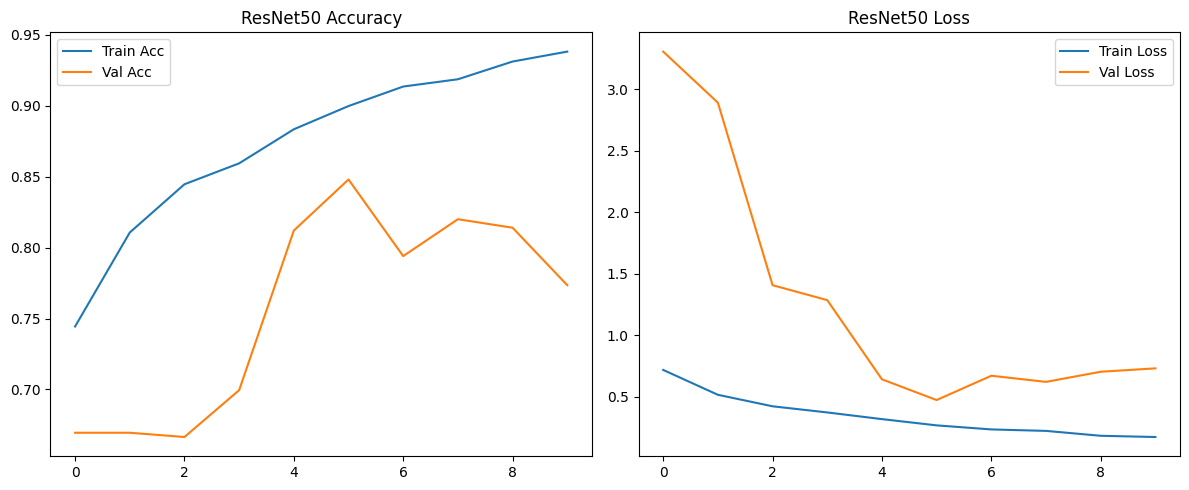

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0, ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- Configuration ---
IMAGE_FOLDER = "/content/drive/MyDrive/ml_project/pre_processing_data/processed_image"
CSV_PATH = "/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv"
CLASS_COLUMNS = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# --- Load and preprocess dataframe ---
df = pd.read_csv(CSV_PATH)
df['label'] = df[CLASS_COLUMNS].idxmax(axis=1)
df['filename'] = df['image'].astype(str) + '.jpg'
df['path'] = df['filename'].apply(lambda x: os.path.join(IMAGE_FOLDER, x))
df = df[df['path'].apply(os.path.exists)]

train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# --- Image generators ---
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.2
)

val_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_dataframe(
    train_df,
    x_col='path',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_gen.flow_from_dataframe(
    val_df,
    x_col='path',
    y_col='label',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# --- Model builder function ---
def build_model(base, input_shape=(224, 224, 3), num_classes=7):
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    out = Dense(num_classes, activation='softmax')(x)
    return Model(inputs=base.input, outputs=out)

# # --- Train EfficientNetB0 ---
# efficientnet_base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
# efficientnet_model = build_model(efficientnet_base)
# efficientnet_model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
# history_efficientnet = efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
# efficientnet_model.save("efficientnetb0_model.h5")

# --- Train ResNet50 ---
resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
resnet_model = build_model(resnet_base)
resnet_model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
history_resnet = resnet_model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS)
resnet_model.save("resnet50_model.h5")

# --- Plot accuracy and loss ---
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# plot_history(history_efficientnet, "EfficientNetB0")
plot_history(history_resnet, "ResNet50")


In [ ]:
from tensorflow.keras.models import load_model
resnet_model = load_model("resnet50_model.h5")

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict the probabilities
val_preds_prob = resnet_model.predict(val_generator, verbose=1)

# Get predicted class labels
val_preds = np.argmax(val_preds_prob, axis=1)

# Get true class labels
true_labels = val_generator.classes

# Get class names (important for reports)
class_names = list(val_generator.class_indices.keys())


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 901s 14s/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, val_preds, target_names=class_names))

              precision    recall  f1-score   support

       AKIEC       0.79      0.46      0.58        65
         BCC       0.73      0.68      0.70       103
         BKL       0.57      0.79      0.67       219
          DF       0.52      0.48      0.50        23
         MEL       0.45      0.70      0.55       222
          NV       0.96      0.81      0.88      1339
        VASC       0.38      0.93      0.53        29

    accuracy                           0.77      2000
   macro avg       0.63      0.69      0.63      2000
weighted avg       0.83      0.77      0.79      2000



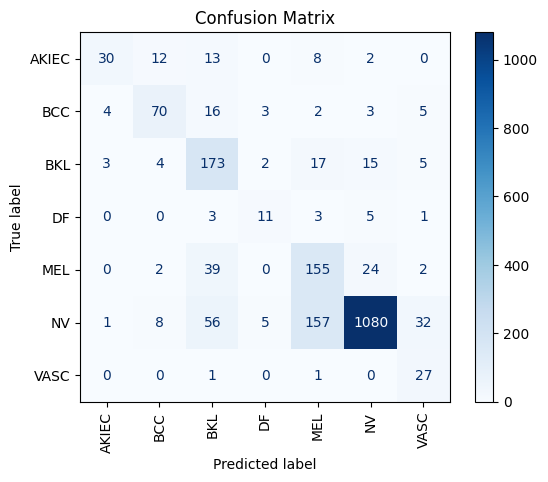

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_labels, val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 70,699,927 (269.70 MB)

 Trainable params: 23,548,935 (89.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,097,872 (179.66 MB)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 12,091,570 (46.13 MB)

 Trainable params: 4,016,515 (15.32 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 8,033,032 (30.64 MB)

In [ ]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
import tensorflow as tf

# --- Class labels ---
class_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

# --- Image size expected by the models ---
IMAGE_SIZE = (224, 224)

# --- Load models ---
# efficientnet_model = load_model("efficientnetb0_model.h5")
resnet_model = load_model("resnet50_model.h5")

# --- Prediction function ---
def predict_class(image_path, model, preprocess_fn, model_name):
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Could not read image: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, IMAGE_SIZE)
    image = preprocess_fn(image.astype(np.float32))
    image = np.expand_dims(image, axis=0)  # shape: (1, 224, 224, 3)

    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)
    predicted_label = class_names[predicted_class]

    print(f"🔍 {model_name} Prediction:")
    print(f"Predicted Class Index: {predicted_class}")
    print(f"Disease Name: {predicted_label}")
    print(f"Confidence: {predictions[0][predicted_class]:.4f}")
    print("-" * 40)
    return predicted_class, predicted_label

# --- Example usage ---
image_path = "/content/drive/MyDrive/ml_project/input/PNG/Original/ISIC_0024313.jpg"

# predict_class(image_path, efficientnet_model, efficientnet_preprocess, "EfficientNetB0")
predict_class(image_path, resnet_model, resnet_preprocess, "ResNet50")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 ResNet50 Prediction:
Predicted Class Index: 4
Disease Name: BKL
Confidence: 1.0000
----------------------------------------


(np.int64(4), 'BKL')

✅ All models loaded successfully

🚀 Processing image: /content/drive/MyDrive/ml_project/input/PNG/Original/ISIC_0024388.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


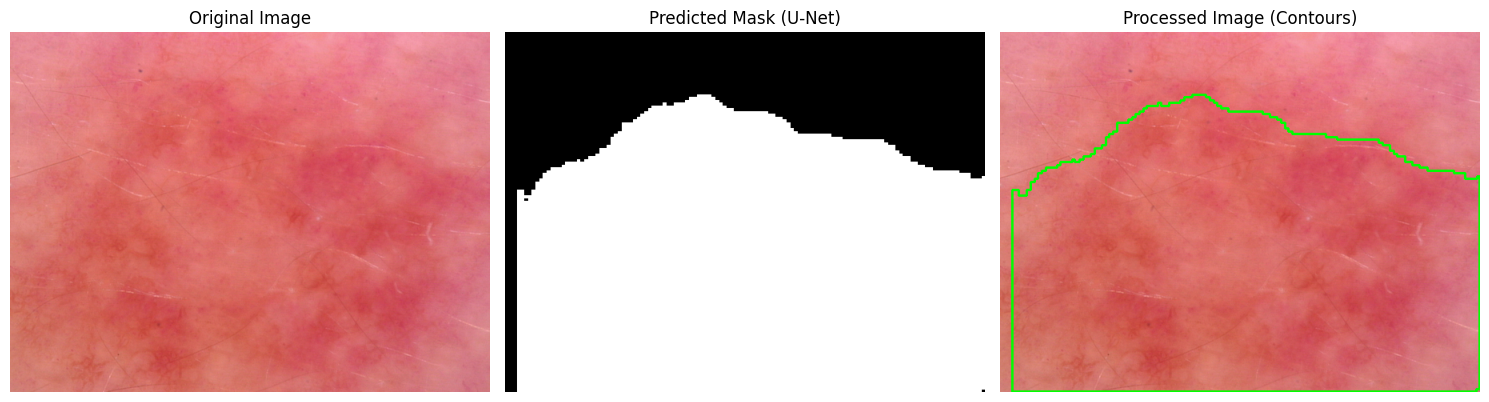

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🔍 ResNet50 Prediction:
Predicted Class Index: 4
Disease Name: BKL
Confidence: 1.0000
----------------------------------------


🚀 Processing image: /content/drive/MyDrive/ml_project/input/PNG/Original/ISIC_0024334.jpg


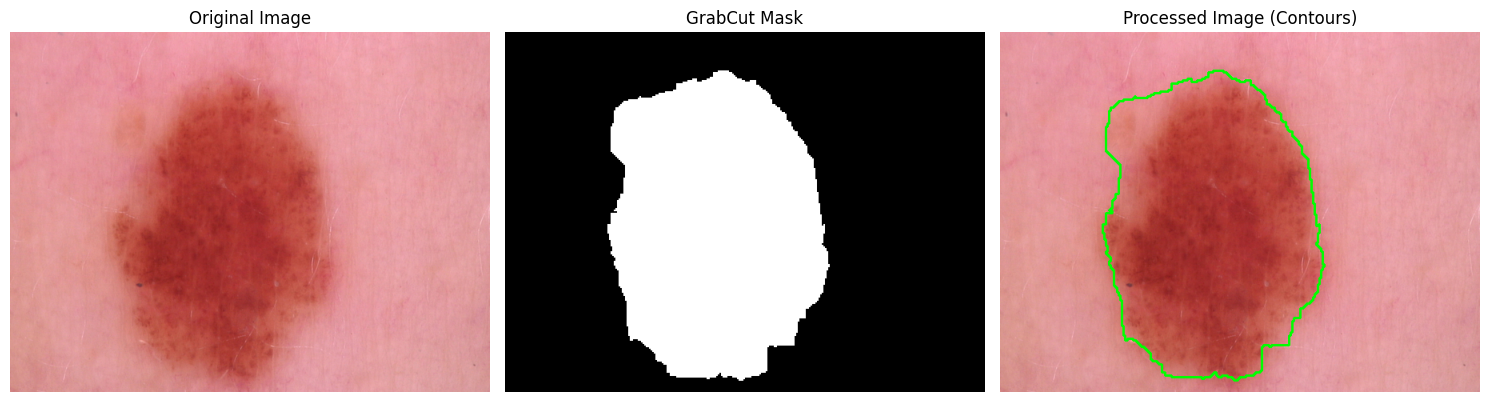

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
🔍 ResNet50 Prediction:
Predicted Class Index: 4
Disease Name: BKL
Confidence: 1.0000
----------------------------------------


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess

# --- Class names ---
class_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

# --- Model input size ---
IMAGE_SIZE = (224, 224)

# --- Load both models once ---
# efficientnet_model = load_model("efficientnetb0_model.h5")
resnet_model = load_model("/content/drive/MyDrive/ml_project/resnet50_model.h5")

# --- Create GrabCut mask ---
def create_grabcut_mask(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    h, w = image.shape[:2]
    small = cv2.resize(image, (w // 2, h // 2))
    mask = np.zeros(small.shape[:2], np.uint8)
    bgModel = np.zeros((1, 65), np.float64)
    fgModel = np.zeros((1, 65), np.float64)
    rect = (5, 5, small.shape[1] - 10, small.shape[0] - 10)
    cv2.grabCut(small, mask, rect, bgModel, fgModel, 2, cv2.GC_INIT_WITH_RECT)
    binary = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')
    return cv2.resize(binary, (w, h), interpolation=cv2.INTER_NEAREST)

# --- Draw contours on image using mask ---
def draw_contours(img, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    out = img.copy()
    if contours:
        cv2.drawContours(out, contours, -1, (0, 255, 0), 2)
    return out

# --- Prediction function ---
def predict_class_from_image(image_array, model, preprocess_fn, model_name):
    image = cv2.resize(image_array, IMAGE_SIZE)
    image = preprocess_fn(image.astype(np.float32))
    image = np.expand_dims(image, axis=0)

    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)
    predicted_label = class_names[predicted_class]
    confidence = predictions[0][predicted_class]

    print(f"🔍 {model_name} Prediction:")
    print(f"Predicted Class Index: {predicted_class}")
    print(f"Disease Name: {predicted_label}")
    print(f"Confidence: {confidence:.4f}")
    print("-" * 40)
    return predicted_class, predicted_label

# --- Full pipeline function ---
def full_pipeline(image_path):
    print(f"🚀 Processing image: {image_path}")

    # Load original
    original = cv2.imread(image_path)
    if original is None:
        print(f"❌ Could not load image: {image_path}")
        return
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

    # Create mask
    mask = create_grabcut_mask(image_path)
    if mask is None:
        print(f"❌ Could not create mask for: {image_path}")
        return

    # Create processed (contoured) image
    processed = draw_contours(original_rgb, mask)

    # Plot all three images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("GrabCut Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(processed)
    plt.title("Processed Image (Contours)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # Pass the processed image to disease prediction
    # predict_class_from_image(processed, efficientnet_model, efficientnet_preprocess, "EfficientNetB0")
    predict_class_from_image(processed, resnet_model, resnet_preprocess, "ResNet50")

# --- Example usage ---
input_image_path = "/content/drive/MyDrive/ml_project/input/PNG/Original/ISIC_0024334.jpg"  # <-- your input image path
full_pipeline(input_image_path)


In [ ]:
patient_info = {
    "name": "Demo",
    "age": 45,
    "gender": "Male",
    "lesion_location": "upper back",
    "image_path": "/content/drive/MyDrive/ml_project/input/PNG/Original/ISIC_0024334.jpg"
}


In [ ]:
def grabcut_pipeline(image_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    mask = np.zeros((h//2, w//2), np.uint8)
    small = cv2.resize(image, (w // 2, h // 2))
    bgModel = np.zeros((1, 65), np.float64)
    fgModel = np.zeros((1, 65), np.float64)
    rect = (5, 5, small.shape[1] - 10, small.shape[0] - 10)

    cv2.grabCut(small, mask, rect, bgModel, fgModel, 2, cv2.GC_INIT_WITH_RECT)
    binary = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')
    mask_resized = cv2.resize(binary, (w, h), interpolation=cv2.INTER_NEAREST)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    processed = draw_contours(image_rgb, mask_resized)
    return image_rgb, mask_resized, processed


In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
import numpy as np
import cv2

# Set expected classifier input size
CLASSIFIER_INPUT_SIZE = (224, 224)

# Class label mapping
class_names = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']

# EfficientNet and ResNet models assumed to be loaded already:
# efficientnet_model = load_model("efficientnetb0_model.h5")
resnet_model = load_model("resnet50_model.h5")

def predict_class_from_image(image_array, model, preprocess_fn, model_name="Model"):
    # Resize and preprocess the image
    image = cv2.resize(image_array, CLASSIFIER_INPUT_SIZE)
    image = preprocess_fn(image.astype(np.float32))
    image = np.expand_dims(image, axis=0)  # Shape: (1, 224, 224, 3)

    # Predict
    predictions = model.predict(image)
    predicted_class = int(np.argmax(predictions))
    predicted_label = class_names[predicted_class]
    confidence = float(predictions[0][predicted_class])

    print(f"🔍 {model_name} Prediction:")
    print(f"Predicted Class Index: {predicted_class}")
    print(f"Disease Name: {predicted_label}")
    print(f"Confidence: {confidence:.4f}")
    print("-" * 40)

    return (confidence, predicted_label)


In [ ]:
import os
from huggingface_hub import login

# Access the token from Colab secrets
huggingface_token = os.getenv("llama_2_chat_hf")

# Now login with the token
login(huggingface_token)


In [ ]:
from transformers import pipeline
llm = pipeline("text-generation", model="tiiuae/falcon-7b-instruct")  # Or your fine-tuned version

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cpu


In [ ]:
def generate_llama_summary(patient_info,  disease2, conf2):
    prompt = f"""
Patient Name: {patient_info['name']}
Age: {patient_info['age']}
Gender: {patient_info['gender']}
Lesion Location: {patient_info['lesion_location']}


AI Model 2 (ResNet50) Diagnosis: {disease2} ({conf2:.2f} confidence)

As a medical assistant, generate a detailed report explaining:
1. The possible conditions based on AI predictions.
2. Recommended next steps (dermatologist, biopsy, etc.)
3. Tests that may be required.
4. General precautions and follow-up advice.
"""
    response = llm(prompt, max_new_tokens=50000)[0]['generated_text']
    return response


In [ ]:
# confidence_1, label_1 = predict_class_from_image(processed_image, efficientnet_model, efficientnet_preprocess, "EfficientNetB0")
confidence_2, label_2 = predict_class_from_image(processed_image, resnet_model, resnet_preprocess, "ResNet50")


NameError: name 'processed_image' is not defined

In [ ]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=11752d87c0a11c9d194a0bf6fa1c81a7bfc3a8f8528b13150d525c0a4e381d78
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
import os
from huggingface_hub import login

# Access the token from Colab secrets
huggingface_token = os.getenv("llama_2_chat_hf")

# Now login with the token
login(huggingface_token)

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
import torch

model_name = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16,
    use_auth_token=True
)

llm = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=512)


/usr/local/lib/python3.11/dist-packages/transformers/models/auto/tokenization_auto.py:898: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/auto/auto_factory.py:476: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
!pip -q install transformers accelerate fpdf bitsandbytes sentencepiece --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 133.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.9 MB/s eta 0:00:00


In [ ]:
# Re-run the final report generation pipeline after kernel reset

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from fpdf import FPDF
from transformers import pipeline
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess

# Configuration
CLASS_NAMES = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
CLASSIFIER_INPUT_SIZE = (224, 224)
REPORT_DIR = "./report_outputs"
os.makedirs(REPORT_DIR, exist_ok=True)

# Load models
# efficientnet_model = load_model("efficientnetb0_model.h5")
resnet_model = load_model("/content/drive/MyDrive/ml_project/resnet50_model.h5")

# Load open-source LLM
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# model_name = "meta-llama/Llama-2-7b-chat-hf"
# tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
# model = AutoModelForCausalLM.from_pretrained(model_name, device_map="auto", use_auth_token=True)

# llm = pipeline("text-generation", model=model, tokenizer=tokenizer, max_new_tokens=512)

def create_grabcut_mask(image):
    h, w = image.shape[:2]
    small = cv2.resize(image, (w // 2, h // 2))
    mask = np.zeros(small.shape[:2], np.uint8)
    bgModel = np.zeros((1, 65), np.float64)
    fgModel = np.zeros((1, 65), np.float64)
    rect = (5, 5, small.shape[1] - 10, small.shape[0] - 10)
    cv2.grabCut(small, mask, rect, bgModel, fgModel, 2, cv2.GC_INIT_WITH_RECT)
    binary_mask = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')
    return cv2.resize(binary_mask, (w, h), interpolation=cv2.INTER_NEAREST)

def draw_contours(img, mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured = img.copy()
    if contours:
        cv2.drawContours(contoured, contours, -1, (0, 255, 0), 2)
    return contoured

def predict_class(image, model, preprocess_fn):
    image_resized = cv2.resize(image, CLASSIFIER_INPUT_SIZE)
    image_preprocessed = preprocess_fn(image_resized.astype(np.float32))
    image_batch = np.expand_dims(image_preprocessed, axis=0)
    preds = model.predict(image_batch)
    class_index = int(np.argmax(preds))
    class_name = CLASS_NAMES[class_index]
    confidence = float(preds[0][class_index])
    return class_name, confidence

def generate_llm_summary(info,  pred2, conf2): # pred1, conf1,
    prompt = f"""
Patient Information:
- Age: {info['age']}
- Gender: {info['gender']}
- Lesion Location: {info['lesion_location']}

AI Predictions:
- ResNet50: {pred2} ({conf2:.2f} confidence)

Write a clinical report explaining:
1. Likely diagnosis based on both predictions.
2. Possible next medical steps or tests to confirm.
3. General precautions the patient should take.
4. Treatment or lifestyle suggestions.
"""
    response = llm(prompt)[0]["generated_text"]
    return response

def save_image(path, image):
    if len(image.shape) == 2:
        cv2.imwrite(path, image)
    else:
        cv2.imwrite(path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

def generate_pdf(info, original_path, mask_path, processed_path, summary_text):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=16)
    pdf.cell(200, 10, "Skin Lesion Diagnosis Report", ln=True, align="C")
    pdf.set_font("Arial", size=12)
    pdf.ln(5)
    pdf.cell(200, 10, f"Patient Name: {info['name']}", ln=True)
    pdf.cell(200, 10, f"Age: {info['age']}    Gender: {info['gender']}    Lesion Location: {info['lesion_location']}", ln=True)
    pdf.ln(10)
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, "Visual Evidence:", ln=True)
    pdf.image(original_path, x=10, y=pdf.get_y(), w=60)
    pdf.image(mask_path, x=75, y=pdf.get_y(), w=60)
    pdf.image(processed_path, x=140, y=pdf.get_y(), w=60)
    pdf.ln(65)
    pdf.multi_cell(0, 10, "LLM-Generated Medical Summary:")
    pdf.set_font("Arial", size=11)
    pdf.multi_cell(0, 10, summary_text)
    pdf_output_path = os.path.join(REPORT_DIR, f"{info['name'].replace(' ', '_')}_report.pdf")
    pdf.output(pdf_output_path)
    return pdf_output_path

def generate_report_from_image(image_path, patient_info):
    img_bgr = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    mask = create_grabcut_mask(img_bgr)
    contoured = draw_contours(img_rgb, mask)

    # pred1, conf1 = predict_class(contoured, efficientnet_model, efficientnet_preprocess)
    pred2, conf2 = predict_class(contoured, resnet_model, resnet_preprocess)

    summary = generate_llm_summary(patient_info, pred2, conf2) #  pred1, conf1,

    base = os.path.splitext(os.path.basename(image_path))[0]
    orig_path = os.path.join(REPORT_DIR, f"{base}_original.jpg")
    mask_path = os.path.join(REPORT_DIR, f"{base}_mask.jpg")
    proc_path = os.path.join(REPORT_DIR, f"{base}_processed.jpg")

    save_image(orig_path, img_rgb)
    save_image(mask_path, mask)
    save_image(proc_path, contoured)

    pdf_path = generate_pdf(patient_info, orig_path, mask_path, proc_path, summary)
    return pdf_path


In [ ]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=70a2e8316c1671784ee75a2a52cdd11737f55a147c3fd59ca4681611b6542190
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
patient_info = {
    "name": "patient_03",
    "age": 36 ,
    "gender": "Male",
    "lesion_location": "Neck",
    "image_path": "/content/drive/MyDrive/ml_project/input/PNG/sample_original/ISIC_0024313.jpg"  # your skin lesion image
}


In [ ]:
pdf_report_path = generate_report_from_image(
    image_path=patient_info['image_path'],
    patient_info=patient_info
)

print(f"✅ Report generated at: {pdf_report_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
✅ Report generated at: ./report_outputs/patient_03_report.pdf


In [ ]:
patient_info = {
    "name": "John Doe",
    "age": 45,
    "gender": "Male",
    "lesion_location": "Upper Back",
    "image_path": "/content/drive/MyDrive/ml_project/input/PNG/sample_original/ISIC_0024308.jpg"
}

pdf_path = generate_report_from_image(patient_info['image_path'], patient_info)
print(f"Download your report here: {pdf_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Download your report here: ./report_outputs/John_Doe_report.pdf


In [ ]:
from transformers import pipeline

# Load the LLM (lighter model to avoid heavy memory usage)
# llm = pipeline("text-generation", model="tiiuae/falcon-7b-instruct", max_new_tokens=512)

# Sample simulated patient data
patient_info = {
    "name": "xyz",
    "age": 45,
    "gender": "Male",
    "lesion_location": "neck"
}

# Sample AI predictions
# pred1 = "BCC"  # from EfficientNet
# conf1 = 0.87
pred2 = "NV"   # from ResNet
conf2 = 0.91

# Prepare the prompt
prompt = f"""
Patient Information:
- Age: {patient_info['age']}
- Gender: {patient_info['gender']}
- Lesion Location: {patient_info['lesion_location']}

AI Predictions:
- ResNet50: {pred2} ({conf2:.2f} confidence)

Write a clinical report explaining:
1. Likely diagnosis based on both predictions.
2. Possible next medical steps or tests to confirm.
3. General precautions the patient should take.
4. Treatment or lifestyle suggestions.
"""

# Ask LLM
response = llm(prompt)

# Print the summary text
print("\n📝 LLM-Generated Clinical Summary:\n")
print(response[0]['generated_text'])


Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.



📝 LLM-Generated Clinical Summary:


Patient Information:
- Age: 45
- Gender: Male
- Lesion Location: neck

AI Predictions:
- ResNet50: NV (0.91 confidence)

Write a clinical report explaining:
1. Likely diagnosis based on both predictions.
2. Possible next medical steps or tests to confirm.
3. General precautions the patient should take.
4. Treatment or lifestyle suggestions.

The patient has a lesion located in the neck, which is likely to be a benign skin growth. However, given the high confidence level of the ResNet50 prediction, further examination is recommended. The patient should consult a dermatologist or other medical professional for a proper diagnosis and treatment plan.


In [ ]:
print(response[0]['generated_text'])


Patient Information:
- Age: 45
- Gender: Male
- Lesion Location: upper back

AI Predictions:
- ResNet50: NV (0.91 confidence)

Write a clinical report explaining:
1. Likely diagnosis based on both predictions.
2. Possible next medical steps or tests to confirm.
3. General precautions the patient should take.
4. Treatment or lifestyle suggestions.

The patient has a lesion located in the upper back, which is likely to be a dermatofibrosarcoma protuberans (DFSP). This is a rare type of cancer that typically affects the deep layers of skin and can spread to other areas of the body. The patient should see a dermatologist or oncologist for a biopsy to confirm the diagnosis. In the meantime, they should avoid sun exposure and wear protective clothing and sunscreen. It is also recommended to avoid any strenuous physical activity or heavy lifting.


In [ ]:
feedback = "The patient has a lesion located in the neck, which is likely to be a benign skin growth. However, given the high confidence level of the ResNet50 prediction, further examination is recommended. The patient should consult a dermatologist or other medical professional for a proper diagnosis and treatment plan."

In [ ]:
feedback

'The patient has a lesion located in the neck, which is likely to be a benign skin growth. However, given the high confidence level of the ResNet50 prediction, further examination is recommended. The patient should consult a dermatologist or other medical professional for a proper diagnosis and treatment plan.'

In [ ]:
# ╔═══════════════════════════════════════════════════════════════════════════╗
# ║  Full Working Pipeline • LLaMA-2 • Latin-1 Safe PDF • Quick Unicode Fix ║
# ╚═══════════════════════════════════════════════════════════════════════════╝
# !pip install -q transformers accelerate fpdf bitsandbytes sentencepiece

import os, cv2, numpy as np, torch
import datetime
from pathlib import Path
from fpdf import FPDF
from huggingface_hub import login
from transformers import (AutoTokenizer, AutoModelForCausalLM,
                          BitsAndBytesConfig, pipeline)
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess

# # ─────────────────────────────────────────────────────────────────────────────
# # 1. Authentication (HuggingFace token from Colab Secrets)
# # ─────────────────────────────────────────────────────────────────────────────
# hf_token = os.getenv("HUGGINGFACE_TOKEN")
# assert hf_token, "⚠️ Add Hugging Face token in Runtime ➔ Manage Secrets first!"
# login(hf_token)

# # ─────────────────────────────────────────────────────────────────────────────
# # 2. Load LLaMA-2 7B (float16 by default; 4-bit optional below)
# # ─────────────────────────────────────────────────────────────────────────────
# MODEL_NAME = "meta-llama/Llama-2-7b-chat-hf"

# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_auth_token=True)

# model = AutoModelForCausalLM.from_pretrained(
#     MODEL_NAME,
#     torch_dtype=torch.float16,
#     device_map="auto",
#     use_auth_token=True
# )

# # # (Optional) 4-bit quantized load if you want ultra-low memory usage
# # bnb_cfg = BitsAndBytesConfig(
# #     load_in_4bit=True,
# #     bnb_4bit_use_double_quant=True,
# #     bnb_4bit_quant_type="nf4",
# #     bnb_4bit_compute_dtype=torch.float16
# # )
# # model = AutoModelForCausalLM.from_pretrained(
# #     MODEL_NAME, quantization_config=bnb_cfg,
# #     device_map="auto", use_auth_token=True
# # )

# llm = pipeline(
#     "text-generation",
#     model=model,
#     tokenizer=tokenizer,
#     max_new_tokens=512,
#     do_sample=True,
#     temperature=0.6,
#     top_p=0.9,
#     repetition_penalty=1.1,
# )

# ─────────────────────────────────────────────────────────────────────────────
# 3. Load your CNN skin classifier
# ─────────────────────────────────────────────────────────────────────────────
CLASS_NAMES = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
resnet_model = load_model("/content/drive/MyDrive/ml_project/resnet50_model.h5")
CLASSIFIER_SIZE = (224, 224)

REPORT_DIR = Path("report_outputs")
REPORT_DIR.mkdir(exist_ok=True)

# ─────────────────────────────────────────────────────────────────────────────
# 4. Computer Vision helpers
# ─────────────────────────────────────────────────────────────────────────────
def create_grabcut_mask(img):
    h, w = img.shape[:2]
    small = cv2.resize(img, (w//2, h//2))
    mask = np.zeros(small.shape[:2], np.uint8)
    bg, fg = np.zeros((1,65), np.float64), np.zeros((1,65), np.float64)
    rect = (5,5, small.shape[1]-10, small.shape[0]-10)
    cv2.grabCut(small, mask, rect, bg, fg, 2, cv2.GC_INIT_WITH_RECT)
    bin_mask = np.where((mask==2)|(mask==0), 0, 255).astype("uint8")
    return cv2.resize(bin_mask, (w,h), cv2.INTER_NEAREST)

def draw_contours(img, mask):
    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    out = img.copy()
    if cnts:
        cv2.drawContours(out, cnts, -1, (0,255,0), 2)
    return out

def predict_class(im, model):
    im = cv2.resize(im, CLASSIFIER_SIZE).astype(np.float32)
    im = resnet_preprocess(im)
    pred = model.predict(np.expand_dims(im,0))[0]
    idx = int(np.argmax(pred))
    return CLASS_NAMES[idx], float(pred[idx])

# ─────────────────────────────────────────────────────────────────────────────
# 5. LLaMA-2 medical report prompt
# ─────────────────────────────────────────────────────────────────────────────
def llama_summary(info, label, conf):
    prompt = f"""
You are an experienced dermatology-assistant LLM.
Write a concise clinical report with EXACTLY these headings:

***Diagnosis***
***Recommended Next Steps***
***Precautions***
***Treatment & Lifestyle Advice***

Each section 2-4 sentences. End with:
"Disclaimer: This AI summary must be validated by a qualified clinician."

PATIENT:
  • Age = {info['age']}
  • Gender = {info['gender']}
  • Lesion location = {info['lesion_location']}

AI FINDINGS:
  • Ai model prediction = {label} ({conf:.2%} confidence)
"""
    txt = llm(prompt)[0]["generated_text"]
    start = txt.find("Diagnosis")
    return txt[start:] if start != -1 else txt

# ─────────────────────────────────────────────────────────────────────────────
# 6. Latin-1-safe text fixer (Quick Unicode Cleaner)
# ─────────────────────────────────────────────────────────────────────────────
def latin1_safe(text: str) -> str:
    replacements = {
        "•": "-",  "–": "-",  "—": "-",  "“": '"',  "”": '"',  "’": "'",
        "→": "->", "≤": "<=", "≥": ">=", "°": " degrees"
    }
    for bad, good in replacements.items():
        text = text.replace(bad, good)
    return text.encode("latin1", "ignore").decode("latin1")

# ─────────────────────────────────────────────────────────────────────────────
# 7. PDF generator using classic Arial
# ─────────────────────────────────────────────────────────────────────────────
def make_pdf(info, img_o, img_m, img_c, summary):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    pdf.set_font("Arial", "B", 16)
    pdf.cell(0,10,"Skin-Lesion Diagnosis Report", ln=True, align="C")
    pdf.ln(5)

    pdf.set_font("Arial", size=11)
    for k,v in [("Patient Name", info["name"]), ("Age", info["age"]),
                ("Gender", info["gender"]), ("Lesion Location", info["lesion_location"]),
                ("Report Date", datetime.datetime.now().strftime("%Y-%m-%d %H:%M"))]:
        pdf.set_font("Arial", "B", 11)
        pdf.cell(45,8,k,1,0,"L")
        pdf.set_font("Arial", "", 11)
        pdf.cell(0,8,str(v),1,1,"L")
    pdf.ln(4)

    y = pdf.get_y()
    pdf.image(str(img_o), x=10, y=y, w=60)
    pdf.image(str(img_m), x=75, y=y, w=60)
    pdf.image(str(img_c), x=140, y=y, w=60)
    pdf.ln(68)

    pdf.set_font("Arial", "B", 12)
    pdf.cell(0,8,"AI-Generated Clinical Summary", ln=True)
    pdf.set_font("Arial", size=11)
    pdf.multi_cell(0,7,latin1_safe(summary))  # 🛡 Apply quick unicode fix here

    output_path = REPORT_DIR / f"{info['name'].replace(' ','_')}_report.pdf"
    pdf.output(str(output_path))
    return output_path

def cv_save(path, img):
    if img.ndim == 2:
        cv2.imwrite(str(path), img)
    else:
        cv2.imwrite(str(path), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# ─────────────────────────────────────────────────────────────────────────────
# 8. Full pipeline master function
# ─────────────────────────────────────────────────────────────────────────────
def generate_report(image_path:str, patient:dict):
    bgr = cv2.imread(image_path)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

    mask = create_grabcut_mask(bgr)
    cont = draw_contours(rgb, mask)

    label, conf = predict_class(cont, resnet_model)
    summary = llama_summary(patient, label, conf)

    base = Path(image_path).stem
    op, mp, cp = (REPORT_DIR / f"{base}_{s}.jpg" for s in ("orig", "mask", "proc"))

    for p, img in zip((op, mp, cp), (rgb, mask, cont)):
        cv_save(p, img)

    pdf_path = make_pdf(patient, op, mp, cp, summary)
    return pdf_path



In [ ]:
# ─────────────────────────────────────────────────────────────────────────────
# 9. Usage Example
# ─────────────────────────────────────────────────────────────────────────────
patient_info = {
    "name": "patient_10",
    "age": 20,
    "gender": "Male",
    "lesion_location": "Upper Back",
    "Medical History": "Patient was diagnosed with skin cancer in the past."
}
report = generate_report("/content/drive/MyDrive/ml_project/input/PNG/sample_original/ISIC_0024357.jpg", patient_info)
print("✅ PDF saved to:", report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ PDF saved to: report_outputs/patient_10_report.pdf
